#Hand Written Digit CLassification

## Machine Learning

### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


###Loading Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

print("Train images:", X_train_raw.shape)
print("Train labels:", y_train_raw.shape)
print("Test images:", X_test_raw.shape)
print("Test labels:", y_test_raw.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


###Visualisation

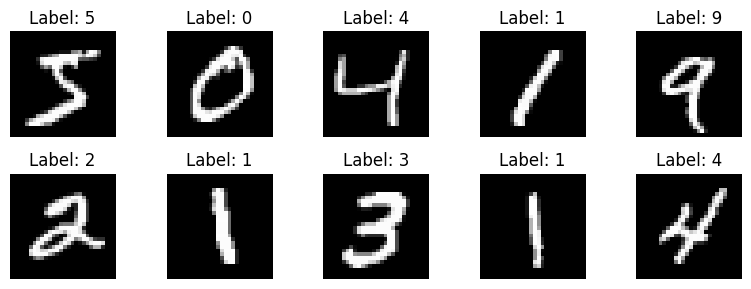

In [ ]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_raw[i], cmap='gray')
    plt.title(f"Label: {y_train_raw[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


###Preprocessing

In [ ]:
X_train_flat = X_train_raw.reshape((X_train_raw.shape[0], -1)).astype("float32") / 255.0
X_test_flat = X_test_raw.reshape((X_test_raw.shape[0], -1)).astype("float32") / 255.0

print("Flattened train shape:", X_train_flat.shape)
print("Flattened test shape:", X_test_flat.shape)

X_train_ml, X_val_ml, y_train_ml, y_val_ml = train_test_split(
    X_train_flat, y_train_raw, test_size=0.2, random_state=42, stratify=y_train_raw
)

print("ML Train:", X_train_ml.shape, "ML Val:", X_val_ml.shape)


Flattened train shape: (60000, 784)
Flattened test shape: (10000, 784)
ML Train: (48000, 784) ML Val: (12000, 784)


## KNN

k = 3: Validation Accuracy = 0.9703
k = 5: Validation Accuracy = 0.9675
k = 7: Validation Accuracy = 0.9663
k = 9: Validation Accuracy = 0.9654
k = 11: Validation Accuracy = 0.9642


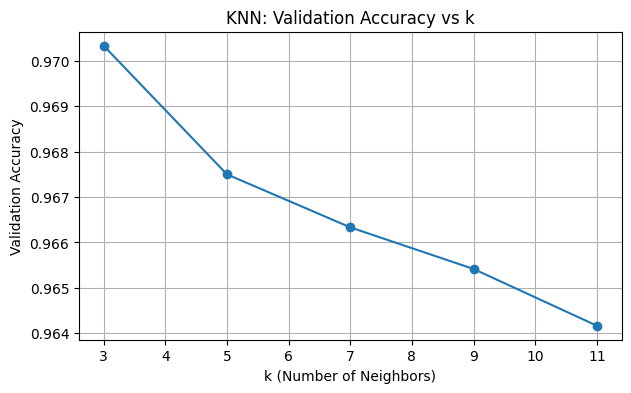

Best k based on validation: 3


In [ ]:
k_values = list(range(3, 12, 2))
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ml, y_train_ml)
    y_val_pred = knn.predict(X_val_ml)
    acc = accuracy_score(y_val_ml, y_val_pred)
    val_accuracies.append(acc)
    print(f"k = {k}: Validation Accuracy = {acc:.4f}")

# Plot accuracy vs k-value
plt.figure(figsize=(7, 4))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("KNN: Validation Accuracy vs k")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(val_accuracies)]
print(f"Best k based on validation: {best_k}")


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_flat, y_train_raw)

y_test_knn = knn_best.predict(X_test_flat)
acc_knn = accuracy_score(y_test_raw, y_test_knn)

print("Final KNN Test Accuracy:", acc_knn)
print("\nClassification Report (KNN):\n", classification_report(y_test_raw, y_test_knn))


Final KNN Test Accuracy: 0.9705

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



##SVM

In [ ]:
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_flat, y_train_raw)

y_test_svm = svm_model.predict(X_test_flat)
acc_svm = accuracy_score(y_test_raw, y_test_svm)

print("SVM Test Accuracy:", acc_svm)
print("\nClassification Report (SVM):\n", classification_report(y_test_raw, y_test_svm))


SVM Test Accuracy: 0.9837

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=250,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_flat, y_train_raw)

y_test_rf = rf_model.predict(X_test_flat)
acc_rf = accuracy_score(y_test_raw, y_test_rf)

print("Random Forest Test Accuracy:", acc_rf)
print("\nClassification Report (Random Forest):\n", classification_report(y_test_raw, y_test_rf))


Random Forest Test Accuracy: 0.9711

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



##Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train_flat, y_train_raw)

y_test_lr = log_reg.predict(X_test_flat)
acc_lr = accuracy_score(y_test_raw, y_test_lr)

print("Logistic Regression Test Accuracy:", acc_lr)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test_raw, y_test_lr))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Test Accuracy: 0.9264

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



## ML models Comparision

KNN: 0.9705
SVM: 0.9837
Logistic Regression: 0.9264
Random Forest: 0.9711


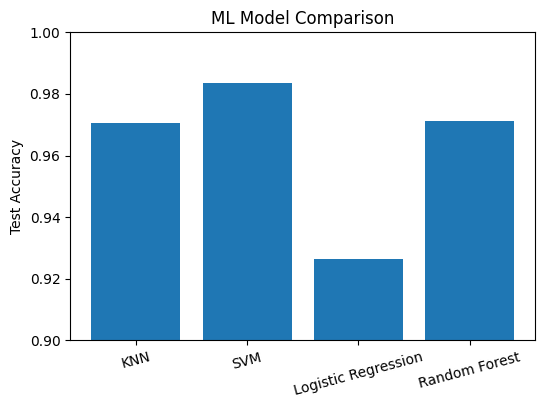

In [ ]:
ml_results = {
    "KNN": acc_knn,
    "SVM": acc_svm,
    "Logistic Regression": acc_lr,
    "Random Forest": acc_rf
}

for model_name, acc in ml_results.items():
    print(f"{model_name}: {acc:.4f}")

plt.figure(figsize=(6,4))
plt.bar(list(ml_results.keys()), list(ml_results.values()))
plt.ylabel("Test Accuracy")
plt.title("ML Model Comparison")
plt.xticks(rotation=15)
plt.ylim(0.9, 1.0)
plt.show()


##Ensemble Model

In [ ]:
ensemble_clf = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=best_k)),
        ('svm', SVC(kernel='rbf', C=10, gamma='scale')),  # no probability=True
        ('lr', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
    ],
    voting='hard'
)

ensemble_clf.fit(X_train_flat, y_train_raw)

y_test_ensemble = ensemble_clf.predict(X_test_flat)
acc_ensemble = accuracy_score(y_test_raw, y_test_ensemble)

print("Ensemble Test Accuracy:", acc_ensemble)
print("\nClassification Report (Ensemble):\n",
      classification_report(y_test_raw, y_test_ensemble))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Ensemble Test Accuracy: 0.9762

Classification Report (Ensemble):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#Deep Learning

##Preprocessing for CNN

In [ ]:
X_train_cnn = X_train_raw.astype("float32") / 255.0
X_test_cnn = X_test_raw.astype("float32") / 255.0

X_train_cnn = X_train_cnn[...,np.newaxis]
X_test_cnn = X_test_cnn[...,np.newaxis]

# One-hot encoder
num_classes = 10
y_train_cnn = to_categorical(y_train_raw, num_classes)
y_test_cnn = to_categorical(y_test_raw, num_classes)

print("CNN Train shape:", X_train_cnn.shape, y_train_cnn.shape)
print("CNN Test shape:", X_test_cnn.shape, y_test_cnn.shape)


# Split train into train + validation for CNN
X_train_cnn_final, X_val_cnn, y_train_cnn_final, y_val_cnn = train_test_split(
    X_train_cnn, y_train_cnn, test_size=0.1, random_state=42
)

print("CNN Train final:", X_train_cnn_final.shape)
print("CNN Val:", X_val_cnn.shape)


CNN Train shape: (60000, 28, 28, 1) (60000, 10)
CNN Test shape: (10000, 28, 28, 1) (10000, 10)
CNN Train final: (54000, 28, 28, 1)
CNN Val: (6000, 28, 28, 1)


##CNN Model(simple)

In [ ]:
simple_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

simple_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

simple_cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the CNN model
history_simple = simple_cnn.fit(
    X_train_cnn_final, y_train_cnn_final,
    epochs=10,
    batch_size=128,
    validation_data=(X_val_cnn, y_val_cnn),
    verbose=1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.8306 - loss: 0.5935 - val_accuracy: 0.9805 - val_loss: 0.0744
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9776 - loss: 0.0734 - val_accuracy: 0.9843 - val_loss: 0.0547
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9855 - loss: 0.0486 - val_accuracy: 0.9863 - val_loss: 0.0447
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9873 - val_loss: 0.0428
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9909 - loss: 0.0290 - val_accuracy: 0.9900 - val_loss: 0.0389
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9853 - val_loss: 0.0451
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9893 - val_loss: 0.0331
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9954 - loss: 0.015

##Plotting the Val loss

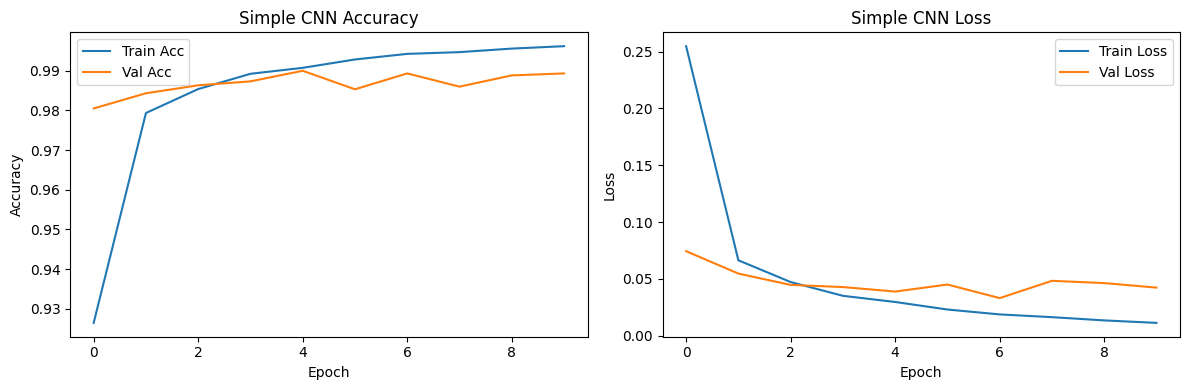

In [ ]:
# Plot training & validation accuracy/loss

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_simple.history['accuracy'], label='Train Acc')
plt.plot(history_simple.history['val_accuracy'], label='Val Acc')
plt.title("Simple CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Val Loss')
plt.title("Simple CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss_simple, test_acc_simple = simple_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"Simple CNN Test Accuracy: {test_acc_simple:.4f}")


Simple CNN Test Accuracy: 0.9892


##LaNet CNN model

In [ ]:
lenet_model = models.Sequential([
    layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=(2,2)),

    layers.Conv2D(64, (5,5), activation='relu', padding='same'),
    layers.AveragePooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

lenet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

lenet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 7, 7, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │       376,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,550 (1.68 MB)

 Trainable params: 439,550 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training LeNet model
history_lenet = lenet_model.fit(
    X_train_cnn_final, y_train_cnn_final,
    epochs=12,
    batch_size=128,
    validation_data=(X_val_cnn, y_val_cnn),
    verbose=1
)

Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 126s 293ms/step - accuracy: 0.8387 - loss: 0.5313 - val_accuracy: 0.9797 - val_loss: 0.0742
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 124s 294ms/step - accuracy: 0.9772 - loss: 0.0735 - val_accuracy: 0.9847 - val_loss: 0.0573
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 125s 297ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9897 - val_loss: 0.0379
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 295ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9885 - val_loss: 0.0391
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 294ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9892 - val_loss: 0.0357
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 126s 299ms/step - accuracy: 0.9933 - loss: 0.0226 - val_accuracy: 0.9903 - val_loss: 0.0318
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 125s 297ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9877 - val_loss: 0.0417
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 140s 293ms/step - accuracy: 0.9948 -

##Plotting the Val Loss

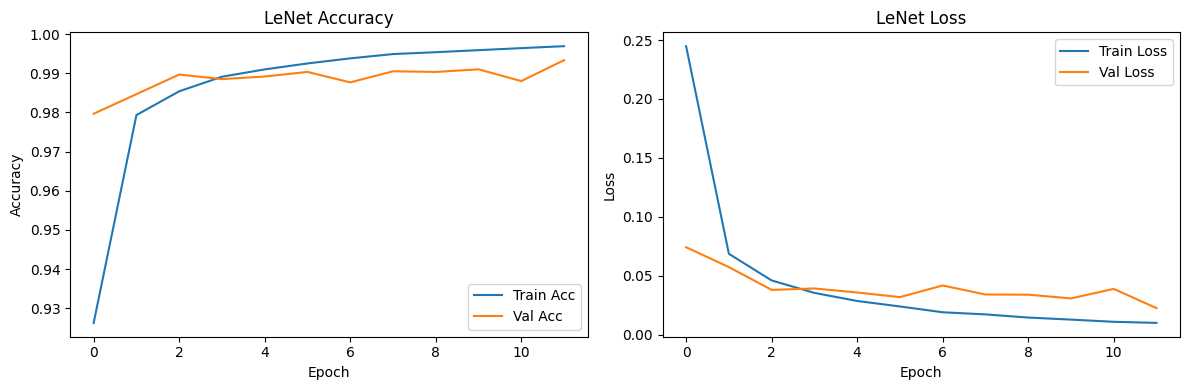

In [ ]:
# Plot LeNet training curves

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_lenet.history['accuracy'], label='Train Acc')
plt.plot(history_lenet.history['val_accuracy'], label='Val Acc')
plt.title("LeNet Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lenet.history['loss'], label='Train Loss')
plt.plot(history_lenet.history['val_loss'], label='Val Loss')
plt.title("LeNet Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss_lenet, test_acc_lenet = lenet_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"LeNet Test Accuracy: {test_acc_lenet:.4f}")

LeNet Test Accuracy: 0.9910


=== Final Model Accuracies ===
KNN: 0.9705
SVM: 0.9837
Logistic Regression: 0.9264
Random Forest: 0.9711
ML Ensemble: 0.9762
Simple CNN: 0.9892
LeNet CNN: 0.9910


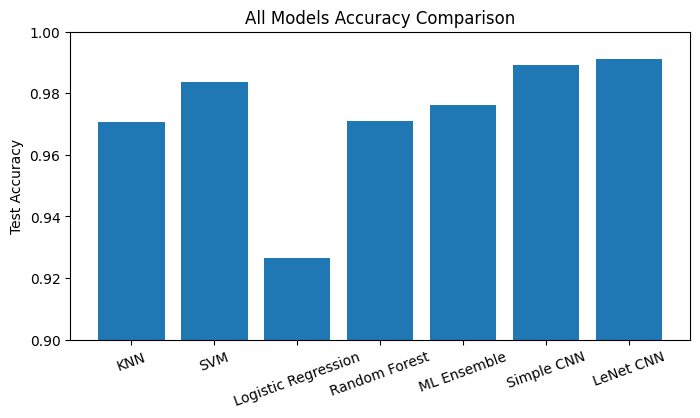

In [ ]:
# Step 9: Final comparison

all_results = {
    "KNN": acc_knn,
    "SVM": acc_svm,
    "Logistic Regression": acc_lr,
    "Random Forest": acc_rf,
    "ML Ensemble": acc_ensemble,
    "Simple CNN": test_acc_simple,
    "LeNet CNN": test_acc_lenet
}

print("=== Final Model Accuracies ===")
for name, acc in all_results.items():
    print(f"{name}: {acc:.4f}")

plt.figure(figsize=(8,4))
plt.bar(all_results.keys(), all_results.values())
plt.xticks(rotation=20)
plt.ylabel("Test Accuracy")
plt.title("All Models Accuracy Comparison")
plt.ylim(0.9, 1.0)  # adjust as needed
plt.show()


##Upload Image & Prediction

Saving Screenshot 2025-11-20 145336.png to Screenshot 2025-11-20 145336 (2).png
Saving Screenshot 2025-11-19 175953.png to Screenshot 2025-11-19 175953 (2).png
Processing file: Screenshot 2025-11-20 145336 (2).png
Before invert - min: 12 max: 220 mean: 162.1454081632653
Inverted image for MNIST-style (white digit on black)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


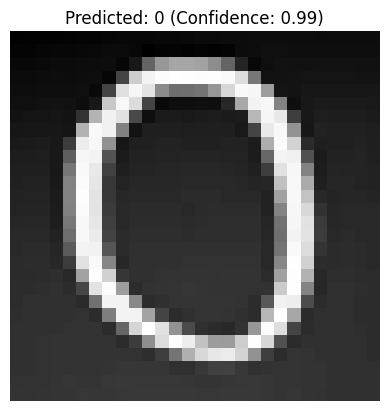

Processing file: Screenshot 2025-11-19 175953 (2).png
Before invert - min: 3 max: 255 mean: 236.2640306122449
Inverted image for MNIST-style (white digit on black)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


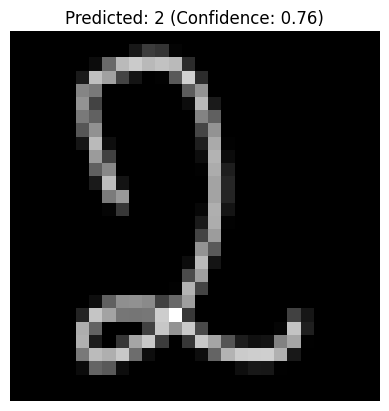

In [ ]:
from google.colab import files
from PIL import Image, ImageOps
import io
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
    print(f"Processing file: {file_name}")

    # 1. Load as grayscale
    img = Image.open(io.BytesIO(uploaded[file_name])).convert('L')

    # 2. Resize to 28x28
    img = img.resize((28, 28))

    # 3. Convert to numpy
    img_arr = np.array(img)

    # ---- NEW: check if we need to invert ----
    # If background is bright and digit is dark, mean will be high
    print("Before invert - min:", img_arr.min(), "max:", img_arr.max(), "mean:", img_arr.mean())

    if img_arr.mean() > 127:  # heuristically: bright background
        img_arr = 255 - img_arr  # invert colors
        print("Inverted image for MNIST-style (white digit on black)")
    # -----------------------------------------

    # 4. Normalize like during training
    img_arr = img_arr.astype("float32") / 255.0

    # 5. Reshape for model
    img_arr_input = img_arr.reshape(1, 28, 28, 1)

    # 6. Predict
    preds = lenet_model.predict(img_arr_input)
    predicted_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)

    # 7. Visualize the actual tensor fed to model
    plt.imshow(img_arr, cmap='gray')
    plt.title(f"Predicted: {predicted_class} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_dir = "/content/drive/MyDrive/Hand_IR_Project"
models_dir = os.path.join(base_dir, "models")
results_dir = os.path.join(base_dir, "results")

os.makedirs(models_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

print("Project folders ready!")


Project folders ready!


In [ ]:
import joblib

joblib.dump(knn_best,        os.path.join(models_dir, "knn_best.joblib"))
joblib.dump(svm_model,       os.path.join(models_dir, "svm_model.joblib"))
joblib.dump(log_reg,         os.path.join(models_dir, "log_reg.joblib"))
joblib.dump(rf_model,        os.path.join(models_dir, "rf_model.joblib"))
joblib.dump(ensemble_clf,    os.path.join(models_dir, "ensemble_clf.joblib"))

print("All ML models saved successfully!")


All ML models saved successfully!


In [ ]:
simple_cnn_path = os.path.join(models_dir, "simple_cnn.h5")
lenet_model_path = os.path.join(models_dir, "lenet_model.h5")

simple_cnn.save(simple_cnn_path)
lenet_model.save(lenet_model_path)

print("CNN and LeNet models saved!")


CNN and LeNet models saved!


In [ ]:
simple_cnn_path = os.path.join(models_dir, "simple_cnn.keras")
lenet_model_path = os.path.join(models_dir, "lenet_model.keras")

simple_cnn.save(simple_cnn_path)
lenet_model.save(lenet_model_path)

print("CNN and LeNet models saved in modern .keras format!")


CNN and LeNet models saved in modern .keras format!


In [ ]:
import numpy as np

np.save(os.path.join(results_dir, "history_simple.npy"), history_simple.history)
np.save(os.path.join(results_dir, "history_lenet.npy"), history_lenet.history)

print("Training histories saved!")


Training histories saved!


In [ ]:
import json

all_results = {
    "KNN": float(acc_knn),
    "SVM": float(acc_svm),
    "Logistic Regression": float(acc_lr),
    "Random Forest": float(acc_rf),
    "ML Ensemble": float(acc_ensemble),
    "Simple CNN": float(test_acc_simple),
    "LeNet CNN": float(test_acc_lenet)
}

with open(os.path.join(results_dir, "final_results.json"), "w") as f:
    json.dump(all_results, f, indent=4)

print("Final accuracy summary saved!")


Final accuracy summary saved!


In [ ]:
import os

figures_dir = "/content/drive/MyDrive/Hand_IR_Project/figures"
os.makedirs(figures_dir, exist_ok=True)


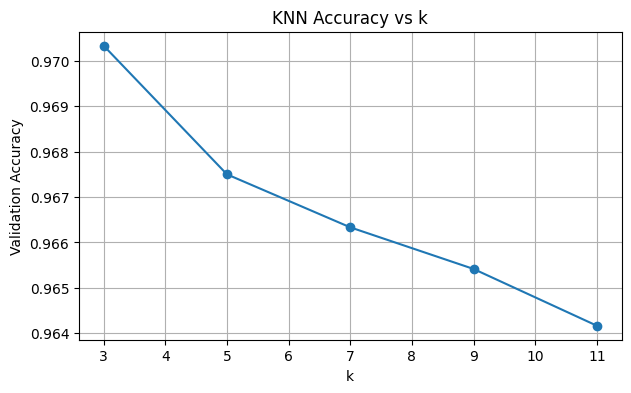

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)

plt.savefig(f"{figures_dir}/knn_accuracy_vs_k.png", dpi=300, bbox_inches='tight')
plt.show()


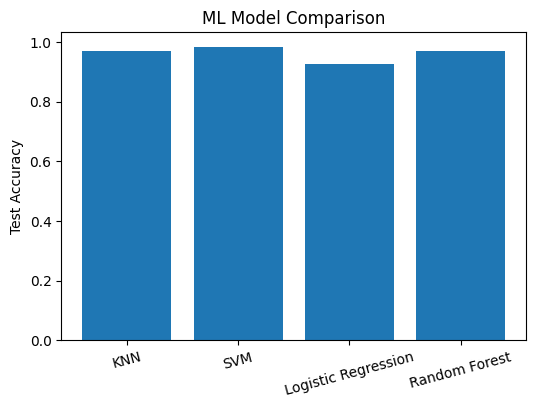

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(list(ml_results.keys()), list(ml_results.values()))
plt.ylabel("Test Accuracy")
plt.title("ML Model Comparison")
plt.xticks(rotation=15)

plt.savefig(f"{figures_dir}/ml_models_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


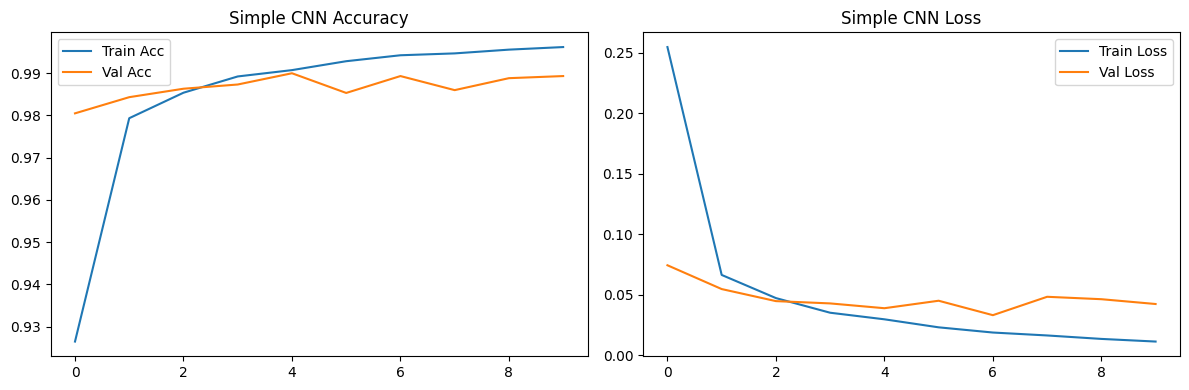

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_simple.history['accuracy'], label='Train Acc')
plt.plot(history_simple.history['val_accuracy'], label='Val Acc')
plt.title("Simple CNN Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Val Loss')
plt.title("Simple CNN Loss")
plt.legend()

plt.tight_layout()

plt.savefig(f"{figures_dir}/simple_cnn_plots.png", dpi=300, bbox_inches='tight')
plt.show()


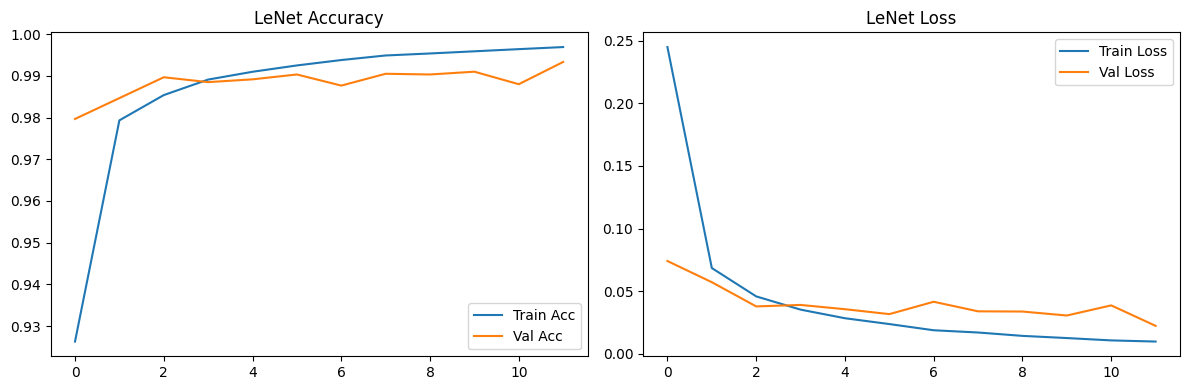

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_lenet.history['accuracy'], label='Train Acc')
plt.plot(history_lenet.history['val_accuracy'], label='Val Acc')
plt.title("LeNet Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_lenet.history['loss'], label='Train Loss')
plt.plot(history_lenet.history['val_loss'], label='Val Loss')
plt.title("LeNet Loss")
plt.legend()

plt.tight_layout()

plt.savefig(f"{figures_dir}/lenet_plots.png", dpi=300, bbox_inches='tight')
plt.show()


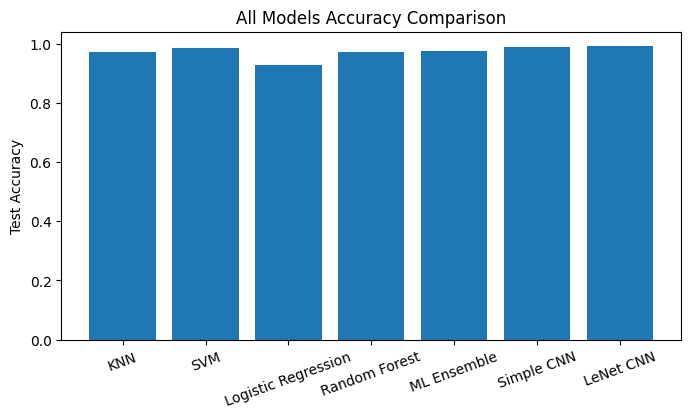

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(all_results.keys(), all_results.values())
plt.xticks(rotation=20)
plt.ylabel("Test Accuracy")
plt.title("All Models Accuracy Comparison")

plt.savefig(f"{figures_dir}/final_models_accuracy_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
